ATENÇÃO! Caso esteja no GitHub, clique acima em Open in Colab para um experiência interativa e completa!

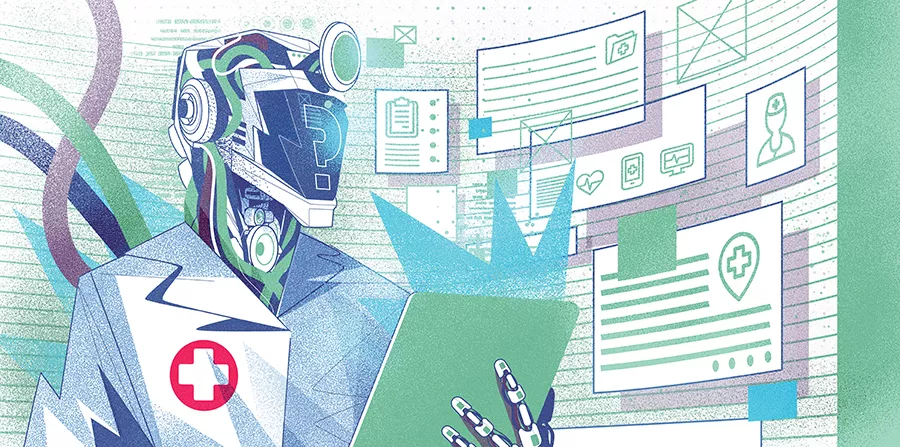

# AVALIAÇÃO E COMPARAÇÃO DE ALGORITMOS DE APRENDIZADO DE MÁQUINA PARA CLASSIFICAÇÃO DE DADOS MÉDICOS: UM ESTUDO SOBRE A PREVISÃO DE DIABETES.



Alunos: Guilherme Alves e Vinícius De Souza Santos

Githubs: https://github.com/ViniciusKanh

Database escolhida: Predict Diabetes Data Set

link: https://www.kaggle.com/datasets/whenamancodes/predict-diabities

 # Processo 1 - Pré-processamento de dados

## Avaliação das características

### Problema a ser investigado


Ao analisar a base de dados "Predict Diabetes" disponível no Kaggle, o problema a ser investigado é a classificação de pacientes em diabéticos ou não diabéticos com base em suas características médicas.

Portanto, o problema de classificação a ser investigado é o seguinte:

Problema: Classificação de pacientes em diabéticos ou não diabéticos com base em características médicas.

Na descrição do estudo, são utilizadas as informações médicas fornecidas na base de dados para desenvolver um modelo de classificação capaz de prever se um paciente é diabético ou não diabético. A variável alvo, chamada de "Outcome" ou "Resultado", é binária, onde 0 representa não diabético e 1 representa diabético.

O método proposto envolve a realização de uma análise exploratória dos dados, o tratamento de valores ausentes ou inconsistentes, o pré-processamento dos dados e a seleção de características relevantes. Em seguida, diferentes algoritmos de classificação podem ser avaliados e comparados para determinar qual deles oferece o melhor desempenho na tarefa de classificação.

As métricas comuns, como acurácia, precisão, recall, F1-score e matriz de confusão, serão utilizadas para avaliar a qualidade dos classificadores e selecionar o modelo de classificação mais adequado para a base de dados em questão.

É importante ressaltar a necessidade de realizar a divisão adequada dos dados em conjuntos de treinamento e teste, a fim de avaliar o desempenho dos classificadores de forma robusta. Além disso, é sempre recomendado utilizar técnicas de validação cruzada para obter uma estimativa mais confiável do desempenho dos modelos.

Este estudo tem como objetivo contribuir para a área de classificação médica, fornecendo insights valiosos sobre a predição da ocorrência de diabetes com base em características médicas específicas. Através da análise exploratória, do pré-processamento dos dados, da seleção criteriosa de características e da comparação de diferentes algoritmos de classificação, espera-se obter um modelo de classificação preciso e confiável.

### Número de amostras

768 amostras, dos quais 500 Não diabéticos e 268 diabéticos.

### Atributos

São ao todo 9 atributos booleanos, sendo eles: 


   1. Gravidezes: Número de vezes que engravidou
   2. Glicose: concentração plasmática de glicose após 2 horas em um teste oral de tolerância à glicose
   3. Pressão arterial: pressão arterial diastólica (mm Hg)
   4. SkinThickness: Espessura da dobra da pele do tríceps (mm)
   5. Insulina: insulina sérica de 2 horas (mu U/ml)
   6. IMC: Índice de massa corporal (peso em kg/(altura em m)^2)
   7. DiabetesPedigreeFunction: função de pedigree do diabetes
   8. Idade: Idade (anos)
   9. Resultado: variável de classe (0 ou 1)


### Sobre valores ausentes


Analisando a base de dados, temos 46 dados definidos como '?'.

## Código

É necessário fazer o upload da base de dados. Para tal, realize os seguintes passos:

1- acesse https://www.kaggle.com/datasets/whenamancodes/predict-diabities

2- clique em data folder

3- clique em diabetes.csv e baixe o arquivo

4- No notebook, clique em Arquivos na barra da esquerda

5- Em seguida, em Fazer upload para o armazenamento da função (1º ícone da esquerda para a direita)

6- Carregue o arquivo baixado 

Pronto! Podemos começar! 



Começando o código.

Github de referência: https://github.com/murilovarges/DataMiningSamples/blob/master/1-Preprocessing/DataCleaning.py

Fazendo os imports 

In [2]:
import pandas as pd
import numpy as np

Faz a leitura do arquivo

In [4]:
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

output_file_abstencao = '/content/diabetesClear.data'
output_file_moda = '/content/diabetesClear.data'
input_file = '/content/diabetes.data' 
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                  names = names,      # Nome das colunas 
                  usecols = features, # Define as colunas que serão  utilizadas
                  na_values='?')      # Define que ? será considerado valores ausentes
  

Mostrando os dados

In [5]:
df_original = df.copy()
# Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n") 

PRIMEIRAS 15 LINHAS

    Número Gestações  Glucose  pressao Arterial  Expessura da Pele  Insulina  \
0                  6    148.0              72.0                 35         0   
1                  1     85.0              66.0                 29         0   
2                  8    183.0              64.0                  0         0   
3                  1     89.0              66.0                 23        94   
4                  0    137.0              40.0                 35       168   
5                  5    116.0              74.0                  0         0   
6                  3     78.0              50.0                 32        88   
7                 10    115.0               NaN                  0         0   
8                  2    197.0              70.0                 45       543   
9                  8    125.0              96.0                  0         0   
10                 4    110.0              92.0                  0         0   
11                1

Alterando os dados dos atributos para valores numéricos

Imprimindo informações sobre os dados

In [6]:
# Imprime informações sobre dos dados
print("INFORMAÇÕES GERAIS DOS DADOS\n")
print(df.info())
print("\n")

INFORMAÇÕES GERAIS DOS DADOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Número Gestações         768 non-null    int64  
 1   Glucose                  763 non-null    float64
 2   pressao Arterial         733 non-null    float64
 3   Expessura da Pele        768 non-null    int64  
 4   Insulina                 768 non-null    int64  
 5   IMC                      757 non-null    float64
 6   Função Pedigree Diabete  768 non-null    float64
 7   Idade                    768 non-null    int64  
 8   Resultado                768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB
None




In [7]:
# Imprime uma analise descritiva sobre dos dados
print("DESCRIÇÃO DOS DADOS\n")
print(df.describe())
print("\n")

DESCRIÇÃO DOS DADOS

       Número Gestações     Glucose  pressao Arterial  Expessura da Pele  \
count        768.000000  763.000000        733.000000         768.000000   
mean           3.845052  121.686763         72.405184          20.536458   
std            3.369578   30.535641         12.382158          15.952218   
min            0.000000   44.000000         24.000000           0.000000   
25%            1.000000   99.000000         64.000000           0.000000   
50%            3.000000  117.000000         72.000000          23.000000   
75%            6.000000  141.000000         80.000000          32.000000   
max           17.000000  199.000000        122.000000          99.000000   

         Insulina         IMC  Função Pedigree Diabete       Idade   Resultado  
count  768.000000  757.000000               768.000000  768.000000  768.000000  
mean    79.799479   32.457464               347.079349   33.240885    0.348958  
std    115.244002    6.924988               254.431

In [8]:
# Imprime a quantidade de valores faltantes por coluna
print("VALORES FALTANTES\n")
print(df.isnull().sum())
print("\n")

VALORES FALTANTES

Número Gestações            0
Glucose                     5
pressao Arterial           35
Expessura da Pele           0
Insulina                    0
IMC                        11
Função Pedigree Diabete     0
Idade                       0
Resultado                   0
dtype: int64




Imprimindo colunas com valores ausentes

In [9]:
columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'number' # number or median or mean or mode

Index(['Glucose', 'pressao Arterial', 'IMC'], dtype='object')


Função para atualizar os valores ausentes para 2, usando a média


In [12]:
def UpdateMissingValues(df, column, method="median", number=2):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)

Salvando um novo arquivo com a substituição para os dados faltantes. para visualizá-lo, atualize a parte de arquivos.


In [13]:
method = 'number' # number or median or mean or mode
    
for c in columns_missing_value:
    UpdateMissingValues(df, c, method, 2)  

# Salva arquivo com o tratamento para dados faltantes
df.to_csv(output_file_abstencao, header=False, index=False)  

# Processo 2 - Redução e Transformação




- Utilize alguma técnica de normalização de dados;

- Utilize a técnica PCA e plot os dois principais componentes.

## Normalização de dados

###Código

Imports necessários

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Lendo o arquivo


In [17]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Separando as características do alvo

In [62]:
# Separating out the features
x = df.loc[:, features].values
    
# Separating out the target
y = df.loc[:,[target]].values

Função para mostrar o dataframe

In [64]:
def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    print(df.describe())
    print(df.head(10))
    print("\n") 

Mostrando o dataframe

In [65]:
ShowInformationDataFrame(df,"Dataframe original")

Dataframe original

<class 'pandas.core.frame.DataFrame'>
Float64Index: 768 entries, 0.3529411764705882 to 0.0588235294117647
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Número Gestações         768 non-null    float64
 1   Glucose                  768 non-null    float64
 2   pressao Arterial         768 non-null    float64
 3   Expessura da Pele        768 non-null    float64
 4   Insulina                 768 non-null    float64
 5   IMC                      768 non-null    float64
 6   Função Pedigree Diabete  768 non-null    float64
 7   Idade                    768 non-null    float64
 8   Resultado                768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 76.2 KB
None
       Número Gestações     Glucose  pressao Arterial  Expessura da Pele  \
count        768.000000  768.000000        768.000000         768.000000   
mean           0.603592    0.559972     

Normalização com Z-score

In [67]:
# Z-score normalization
x_zcore = StandardScaler().fit_transform(x)
normalized1Df = pd.DataFrame(data = x_zcore, columns = features)
normalized1Df = pd.concat([normalized1Df, df[target].reset_index(drop=True)], axis=1)
ShowInformationDataFrame(normalized1Df,"Dataframe Z-Score Normalized")

Dataframe Z-Score Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Número Gestações         768 non-null    float64
 1   Glucose                  768 non-null    float64
 2   pressao Arterial         768 non-null    float64
 3   Expessura da Pele        768 non-null    float64
 4   Insulina                 768 non-null    float64
 5   IMC                      768 non-null    float64
 6   Função Pedigree Diabete  768 non-null    float64
 7   Idade                    768 non-null    float64
 8   Resultado                768 non-null    float64
 9   Resultado                768 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 60.1 KB
None
       Número Gestações       Glucose  pressao Arterial  Expessura da Pele  \
count      7.680000e+02  7.680000e+02      7.680000e+02       7.680000e+02   
mean 

Salvando a normalização

In [68]:
# Salva arquivo com os dados normalizados em Z-Score
normalized1Df.to_csv('/content/DiabetesZscore.data', header=False, index=False) 

Normalização com Min-Max

In [70]:
# Mix-Max normalization
x_minmax = MinMaxScaler().fit_transform(x)
normalized2Df = pd.DataFrame(data = x_minmax, columns = features)
normalized2Df = pd.concat([normalized2Df, df[target].reset_index(drop=True)], axis=1)
ShowInformationDataFrame(normalized2Df,"Dataframe Min-Max Normalized")

Dataframe Min-Max Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Número Gestações         768 non-null    float64
 1   Glucose                  768 non-null    float64
 2   pressao Arterial         768 non-null    float64
 3   Expessura da Pele        768 non-null    float64
 4   Insulina                 768 non-null    float64
 5   IMC                      768 non-null    float64
 6   Função Pedigree Diabete  768 non-null    float64
 7   Idade                    768 non-null    float64
 8   Resultado                768 non-null    float64
 9   Resultado                768 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 60.1 KB
None
       Número Gestações     Glucose  pressao Arterial  Expessura da Pele  \
count        768.000000  768.000000        768.000000         768.000000   
mean     

Salvando a normalização

In [71]:
# Salva arquivo com os dados normalizados em Min-Max
normalized2Df.to_csv('/content/Diabetes-Min-Max.data', header=False, index=False) 

##Redução de dados e PCA


###Código

Imports


In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

Para Normalização Min-Max

Lendo os arquivos


In [91]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [90]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Número Gestações         768 non-null    float64
 1   Glucose                  768 non-null    float64
 2   pressao Arterial         768 non-null    float64
 3   Expessura da Pele        768 non-null    float64
 4   Insulina                 768 non-null    float64
 5   IMC                      768 non-null    float64
 6   Função Pedigree Diabete  768 non-null    float64
 7   Idade                    768 non-null    float64
 8   Resultado                768 non-null    float64
 9   Resultado                768 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 60.1 KB
None
       Número Gestações     Glucose  pressao Arterial  Expessura da Pele  \
count        768.000000  768.000000        768.000000         768.000000   
mean           0.

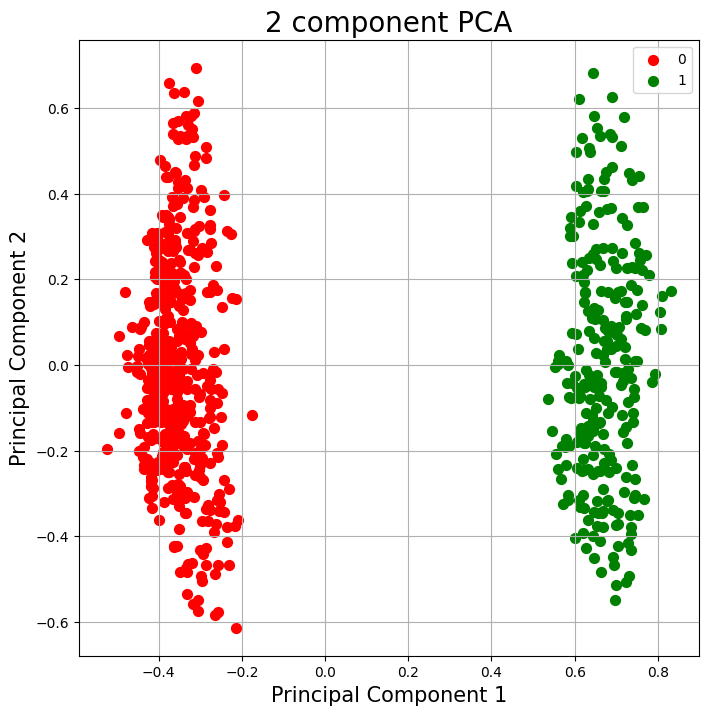

In [92]:
# Standardizing the features
x = MinMaxScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")


def VisualizePcaProjection(finalDf, targetColumn):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [0, 1, ]
  colors = ['r', 'g']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf[targetColumn] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()
  plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                      'principal component 2'])
finalDf = pd.concat([principalDf, df[target].reset_index(drop=True)], axis=1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Para normalização com StandardScaler

In [93]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [94]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Número Gestações         768 non-null    float64
 1   Glucose                  768 non-null    float64
 2   pressao Arterial         768 non-null    float64
 3   Expessura da Pele        768 non-null    float64
 4   Insulina                 768 non-null    float64
 5   IMC                      768 non-null    float64
 6   Função Pedigree Diabete  768 non-null    float64
 7   Idade                    768 non-null    float64
 8   Resultado                768 non-null    float64
 9   Resultado                768 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 60.1 KB
None
       Número Gestações       Glucose  pressao Arterial  Expessura da Pele  \
count      7.680000e+02  7.680000e+02      7.680000e+02       7.680000e+02   
mean      -6.

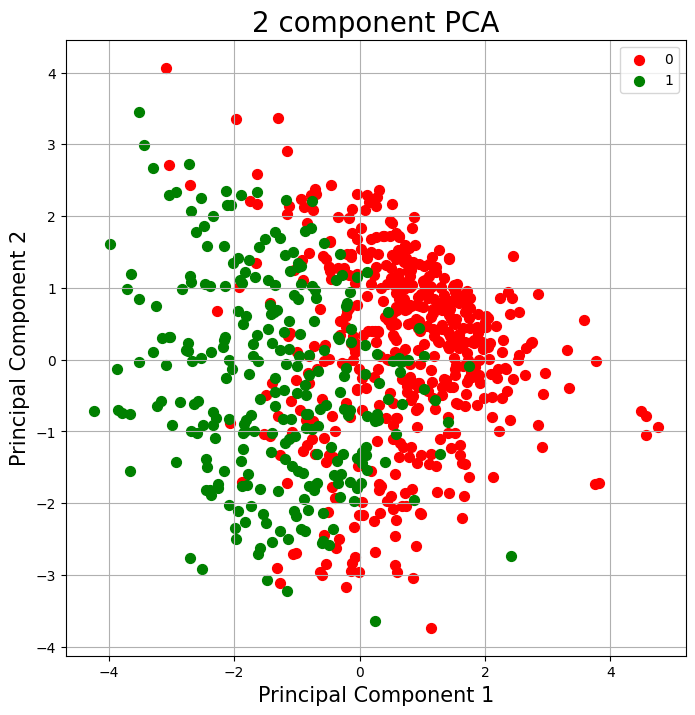

In [95]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")

def VisualizePcaProjection(finalDf, targetColumn):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, ]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[targetColumn] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                               columns = ['principal component 1', 
                                          'principal component 2'])
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Para normalização com RobustScaler

In [96]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [97]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Número Gestações         768 non-null    float64
 1   Glucose                  768 non-null    float64
 2   pressao Arterial         768 non-null    float64
 3   Expessura da Pele        768 non-null    float64
 4   Insulina                 768 non-null    float64
 5   IMC                      768 non-null    float64
 6   Função Pedigree Diabete  768 non-null    float64
 7   Idade                    768 non-null    float64
 8   Resultado                768 non-null    float64
 9   Resultado                768 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 60.1 KB
None
       Número Gestações     Glucose  pressao Arterial  Expessura da Pele  \
count        768.000000  768.000000        768.000000         768.000000   
mean           0.

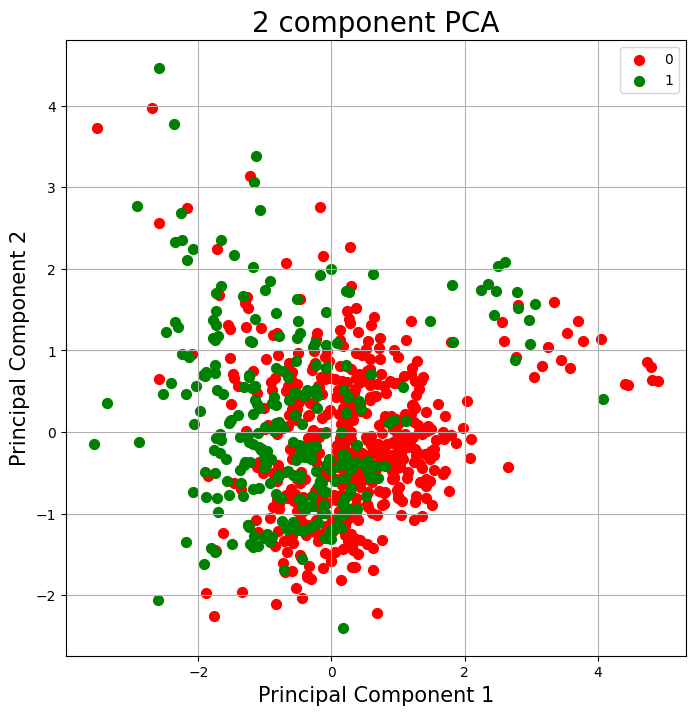

In [100]:
# Standardizing the features
x = RobustScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[target].reset_index(drop=True)], axis=1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")


def VisualizePcaProjection(finalDf, targetColumn):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [0, 1, ]
  colors = ['r', 'g']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf[targetColumn] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()
  plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                      'principal component 2'])
finalDf = pd.concat([principalDf, df[target].reset_index(drop=True)], axis=1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Observando o PCA dos 3 casos, podemos notar que todos apresentam comportamento diferentes, devido ao fato da base de dados ser desbalanceada e por se tratar de 2 valores inteiros (0 - Não Diabetico, 1- Diabetico).

Também é possível notar uma separação entre 0 (vermelho/Não Diabetico) e 1 (verde/ Diabetico) a partir do componente 1, sendo a maioria dos vermelhos com valores negativos e a maioria dos verdes com valores positivos.

#Processo 3 - Análise Descritiva - Visualização dos Dados


O gráfico que melhor representa o conjunto de dados é o Histograma. 
Foram construídos 4 gráficos de histograma que melhor representa a distribuição dos dados porem foi feito um tratamento nos graficos que conseguimos classificar para cada exemplo de coluna.

### Código

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Criando os Bins de cada coluna

In [104]:
 # Criando uma nova coluna 'idade_categoria'
binsIdade = [29, 40, 50, 60, 77] # limites das categorias
labelsIdade = ['29-39', '40-49', '50-59', '60-77'] # rótulos das categorias
df['conjunto_idade'] = pd.cut(df['Idade'], bins=binsIdade, labels=labelsIdade)

# Criando uma nova coluna 'imc_categoria'
binsImc = [0, 18.5, 25, 30, 35, 40] # limites das categorias
labelsImc = ['Abaixo do Peso', 'Normal', 'Pré-obesidade', 'Obesidade Classe I', 'Obesidade Classe II'] # rótulos das categorias
df['imc_categoria'] = pd.cut(df['IMC'], bins=binsImc, labels=labelsImc)

# Criando uma nova coluna 'insulina_categoria'
binsInsulina = [0, 140, 199, 200] # limites das categorias
labelsInsulina = ['Saudável', 'Resistência à Insulina', 'Possível Diabético'] # rótulos das categorias
df['insulina_categoria'] = pd.cut(df['Insulina'], bins=binsInsulina, labels=labelsInsulina)

# Classificando a coluna 'Glucose' de acordo com os critérios fornecidos
binsGlucose = [0, 99, 125, 200, float('inf')] # limites das categorias
labelsGlucose = ['Glicemia de jejum normal', 'Glicemia de jejum alterada', 'Pré-Diabetes', 'Alerta'] # rótulos das categorias
df['glucose_categoria'] = pd.cut(df['Glucose'], bins=binsGlucose, labels=labelsGlucose)

# Classificando a coluna 'Glucose' de acordo com critério específico para Glicemia de jejum baixa ou hipoglicemia
#df.loc[df['Glucose'] <= 70, 'glucose_categoria'] = 'Glicemia de jejum baixa ou hipoglicemia'

 # Classificando a coluna 'pressao Arterial' de acordo com os critérios fornecidos
binsPressaoArterial = [0, 80, 85, 90, 99, 100, 109, 110, float('inf')] # limites das categorias
labelsPressaoArterial = ['Normal limítrofe', 'Normal limítrofe', 'Hipertensão leve', 'Hipertensão leve', 'Hipertensão moderada', 'Hipertensão moderada', 'Hipertensão grave', 'Hipertensão sistólica isolada', 'Hipertensão sistólica isolada'] # rótulos das categorias
df['pressao_arterial_categoria'] = pd.cut(df['pressao Arterial'], bins=binsPressaoArterial, labels=labelsPressaoArterial[:-1], ordered=False)

# Classificando a coluna 'Expessura da Pele' de acordo com os critérios fornecidos
binsExpessuraPele = [0, 5, 9, 10, 15, 16, 20, float('inf')] # limites das categorias
labelsExpessuraPele = ['Muito fina', 'Fina', 'Fina', 'Moderada', 'Moderada', 'Espessa', 'Muito espessa'] # rótulos das categorias
df['expessura_pele_categoria'] = pd.cut(df['Expessura da Pele'], bins=binsExpessuraPele, labels=labelsExpessuraPele, ordered=False)


# Classificando a coluna 'Número de Gestações' de acordo com os critérios fornecidos
binsGestacoes = [-1, 0, 1, 2, float('inf')] # limites das categorias
labelsGestacoes = ['Nulípara', 'Primípara', 'Secundípara', 'Multípara'] # rótulos das categorias
df['numero_gestacoes_categoria'] = pd.cut(df['Número Gestações'], bins=binsGestacoes, labels=labelsGestacoes)

# Mapeando a coluna 'Resultado' para categorias 'Não Diabético' e 'Diabético'
df['Resultado'] = df['Resultado'].map({0: 'Não Diabético', 1: 'Diabético'})

# Classificando a coluna 'Função Pedigree Diabete' de acordo com os critérios fornecidos
binsPedigree = [0, 1.0, 2.0, float('inf')] # limites das categorias
labelsPedigree = ['Baixa predisposição genética', 'Moderada predisposição genética', 'Alta predisposição genética'] # rótulos das categorias
df['funcao_pedigree_categoria'] = pd.cut(df['Função Pedigree Diabete'], bins=binsPedigree, labels=labelsPedigree)


Criando os graficos a partir das colunas categorizadas

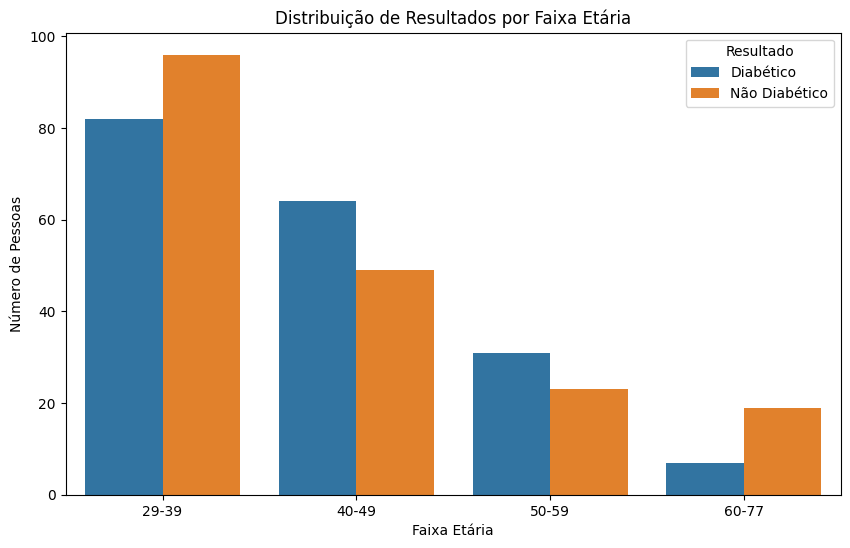

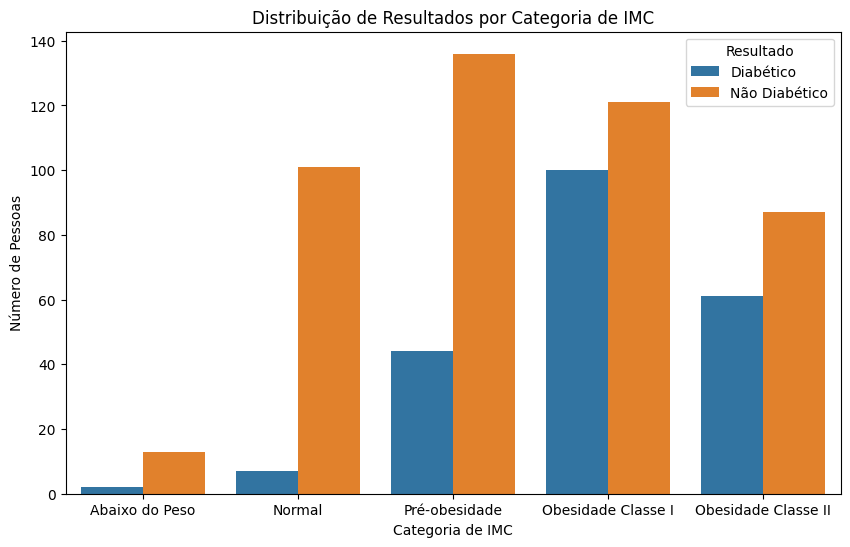

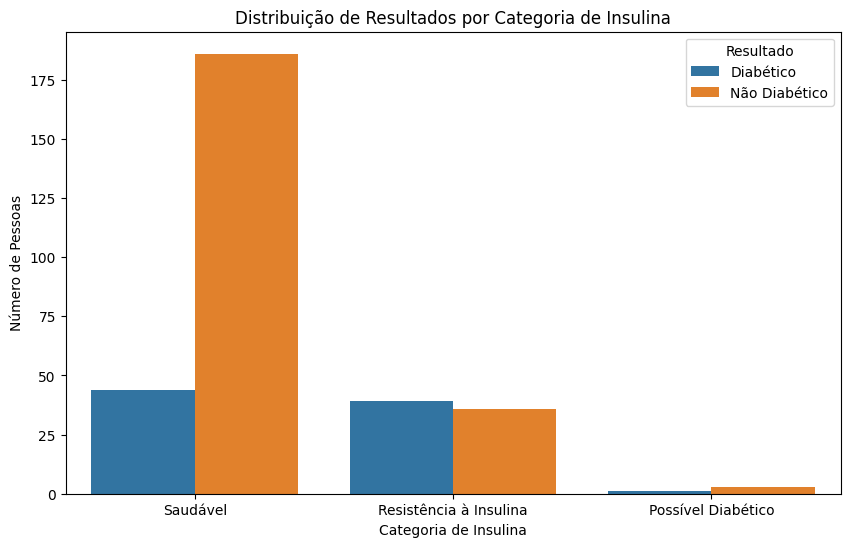

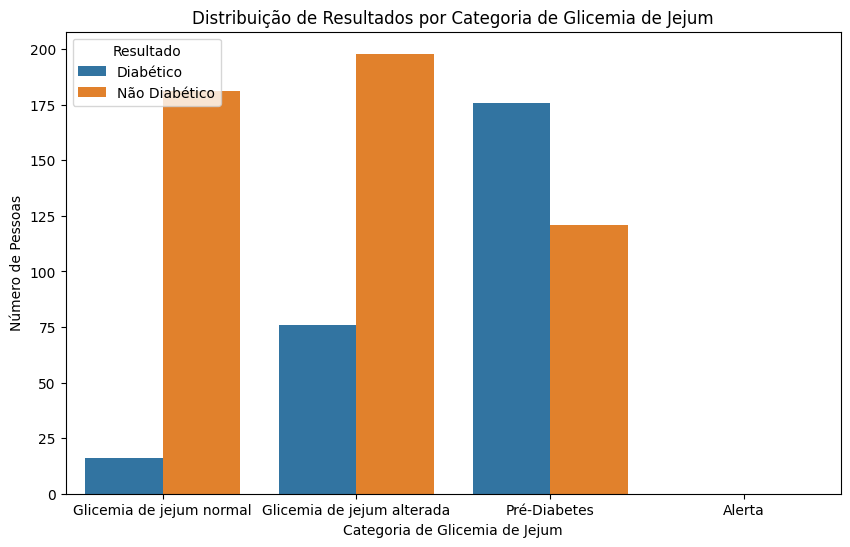

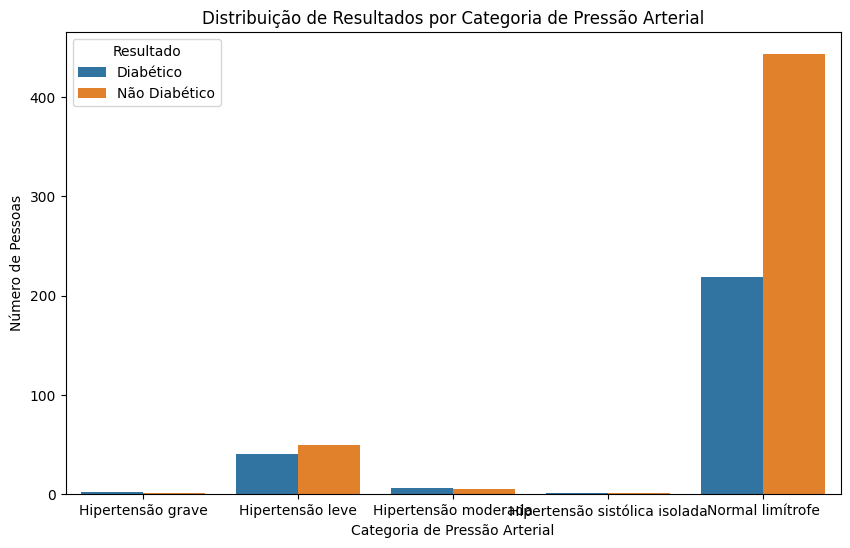

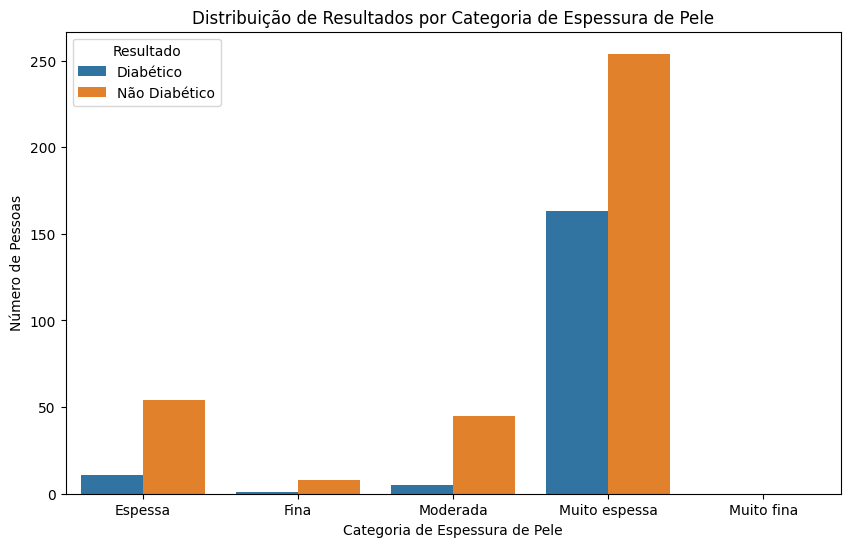

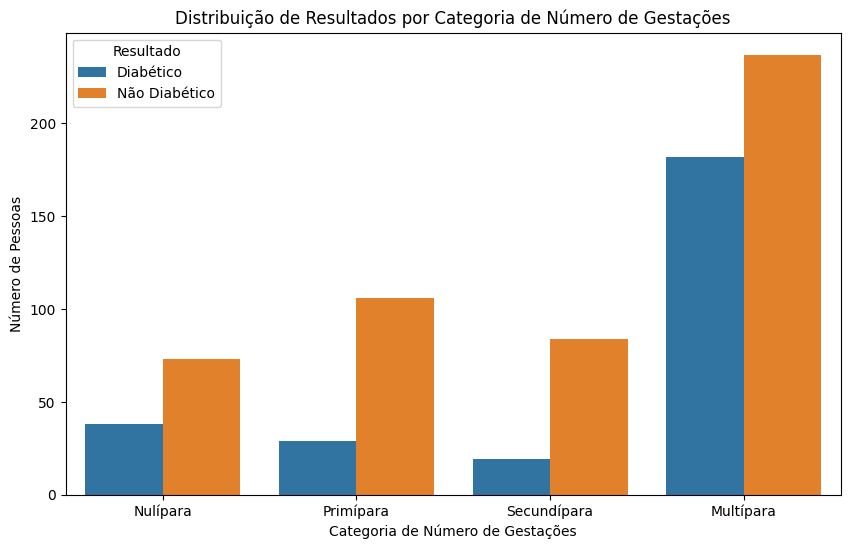

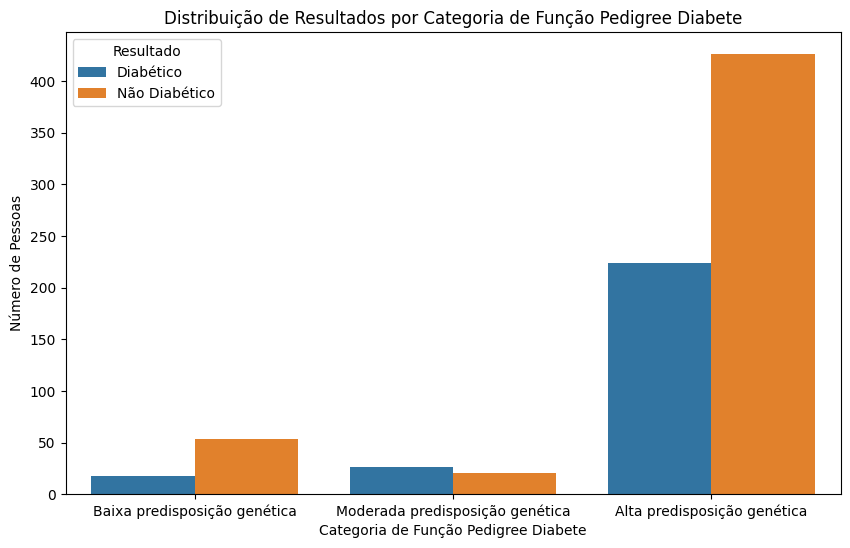

In [105]:
# Criando gráfico de barras para a categoria 'conjunto_idade'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='conjunto_idade', hue='Resultado')
plt.title('Distribuição de Resultados por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.show()

# Criando gráfico de barras para a categoria 'imc_categoria'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='imc_categoria', hue='Resultado')
plt.title('Distribuição de Resultados por Categoria de IMC')
plt.xlabel('Categoria de IMC')
plt.ylabel('Número de Pessoas')
plt.show()

# Criando gráfico de barras para a categoria 'insulina_categoria'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insulina_categoria', hue='Resultado')
plt.title('Distribuição de Resultados por Categoria de Insulina')
plt.xlabel('Categoria de Insulina')
plt.ylabel('Número de Pessoas')
plt.show()

# Criando gráfico de barras para a categoria 'glucose_categoria'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='glucose_categoria', hue='Resultado')
plt.title('Distribuição de Resultados por Categoria de Glicemia de Jejum')
plt.xlabel('Categoria de Glicemia de Jejum')
plt.ylabel('Número de Pessoas')
plt.show()

# Criando gráfico de barras para a categoria 'pressaoArterial_categoria'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pressao_arterial_categoria', hue='Resultado')
plt.title('Distribuição de Resultados por Categoria de Pressão Arterial')
plt.xlabel('Categoria de Pressão Arterial')
plt.ylabel('Número de Pessoas')
plt.show()
    
# Criando gráfico de barras para a categoria 'expessura_pele_categoria'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='expessura_pele_categoria', hue='Resultado')
plt.title('Distribuição de Resultados por Categoria de Espessura de Pele')
plt.xlabel('Categoria de Espessura de Pele')
plt.ylabel('Número de Pessoas')
plt.show()

# Criando gráfico de barras para a categoria 'numero_gestacoes_categoria'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='numero_gestacoes_categoria', hue='Resultado')
plt.title('Distribuição de Resultados por Categoria de Número de Gestações')
plt.xlabel('Categoria de Número de Gestações')
plt.ylabel('Número de Pessoas')
plt.show()

# Criando gráfico de barras para a categoria 'funcao_pedigree_categoria'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='funcao_pedigree_categoria', hue='Resultado')
plt.title('Distribuição de Resultados por Categoria de Função Pedigree Diabete')
plt.xlabel('Categoria de Função Pedigree Diabete')
plt.ylabel('Número de Pessoas')
plt.show()

Mostrando o total de amostra com a doença e sem a doença que foram analisadas na base de dados.

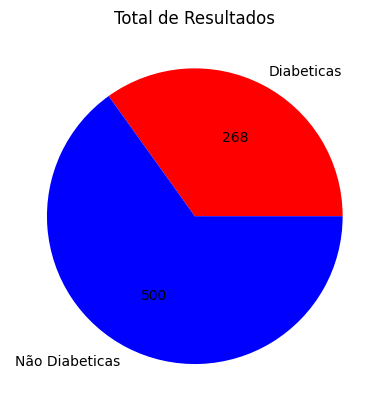

Total: 768

Diabeticas: 34.90%

Não Diabeticas: 65.10



In [106]:
label = ['Diabeticas','Não Diabeticas']
cores = ['r','b']
Diabeticas = df[target].value_counts()[1]
NaoDiabeticas = df[target].value_counts()[0]
total = Diabeticas + NaoDiabeticas
y = np.array([Diabeticas, NaoDiabeticas])
plt.pie(y , labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Total de Resultados')
plt.show() 
print("Total: {}\n".format(total) )
print("Diabeticas: {:.2f}%\n".format((Diabeticas*100)/total))
print("Não Diabeticas: {:.2f}\n".format((NaoDiabeticas*100)/total))

Como forma de obter uma melhor visualização dos dados foi gerado um gráfico de histograma para alguns tipos de dados da base, com esse histograma pode-se observar a relação de resultados positivos (1) e negativos (0), na coluna de outcome. 
Essa relação dá uma dimensão do que os valores de cada coluna têm em correlação com a coluna principal de resultados.


#Processo 4 - Análise Descritiva - Medidas de Resumo

Aqui faremos medidas de resumo, como:
- Medidas de tendencia central;
- Medidas de dispersão;
- Medidas de posição relativa;
- Medidas de associação.

##Código

Lendo a Base de Dados

In [108]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Escolhendo o atributo

In [109]:
atributo = 'IMC'

Medidas de Tendência Central

In [110]:
print("Medidas de Tendência Central\n")
print('Média: {:.2f}'.format(df[atributo].mean())) # Média
print('Mediana: {:.1f}'.format(df[atributo].median())) # Mediana
print('Ponto Médio: {:.0f}'.format((df[atributo].max() + df[atributo].min())/2)) # Ponto Médio
print('Moda: {:.0f}'.format(float(df[atributo].mode()))) # Moda

Medidas de Tendência Central

Média: 32.02
Mediana: 32.0
Ponto Médio: 35
Moda: 32


Medidas de Dispersão

In [111]:
print("Medidas de Dispersão\n")
print('Amplitude: {:.0f}'.format(df[atributo].max() - df[atributo].min()))  # Amplitude
print('Desvio padrão: {:.4f}'.format(df[atributo].std())) # Desvio padrão
print('Variância: {:.4f}'.format(df[atributo].var())) # Variância
print('Coeficiente de variação: {:.4f}'.format(df[atributo].std()/df[atributo].mean())) # Coeficiente de Variação

Medidas de Dispersão

Amplitude: 65
Desvio padrão: 7.7705
Variância: 60.3812
Coeficiente de variação: 0.2427


Medidas de Posição Relativa

In [112]:
print("\nMedidas de Posição Relativa\n")
print('Z Score:\n{}\n'.format((df[atributo] - df[atributo].mean())/df[atributo].std())) # Z Score
print('Quantil (25%): {}'.format(df[atributo].quantile(q=0.25))) # Quantil 25%
print('Quantil (50%): {}'.format(df[atributo].quantile(q=0.50))) # Quantil 50%
print('Quantil (75%): {}'.format(df[atributo].quantile(q=0.75))) # Quantil 75%


Medidas de Posição Relativa

Z Score:
0      0.203175
1     -0.697664
2     -1.122345
3     -0.504627
4      1.425742
         ...   
763    0.113091
764    0.614987
765   -0.749141
766   -0.247245
767   -0.208637
Name: IMC, Length: 768, dtype: float64

Quantil (25%): 27.3
Quantil (50%): 32.0
Quantil (75%): 36.6


Medidas de Associação

In [113]:
print("\nMedidas de Associação\n")
print('Covariância: \n{}\n'.format(df.cov())) # Covariância
print('\nCorrelação: \n{}'.format(df.corr())) # Correlação


Medidas de Associação

Covariância: 
                         Número Gestações      Glucose  pressao Arterial  \
Número Gestações                11.354056    13.933505          9.194781   
Glucose                         13.933505  1019.121820         94.127718   
pressao Arterial                 9.194781    94.127718        362.207707   
Expessura da Pele               -4.390041    29.357351         62.293344   
Insulina                       -28.555231  1219.955362        191.095539   
IMC                              0.471611    55.261417         41.309251   
Função Pedigree Diabete        -23.258540   157.279138        -73.205451   
Idade                           21.570620    99.022298         54.292863   
Resultado                        0.356618     7.115745          0.610570   

                         Expessura da Pele      Insulina         IMC  \
Número Gestações                 -4.390041    -28.555231    0.471611   
Glucose                          29.357351   1219.955362 

Matriz de Correlação

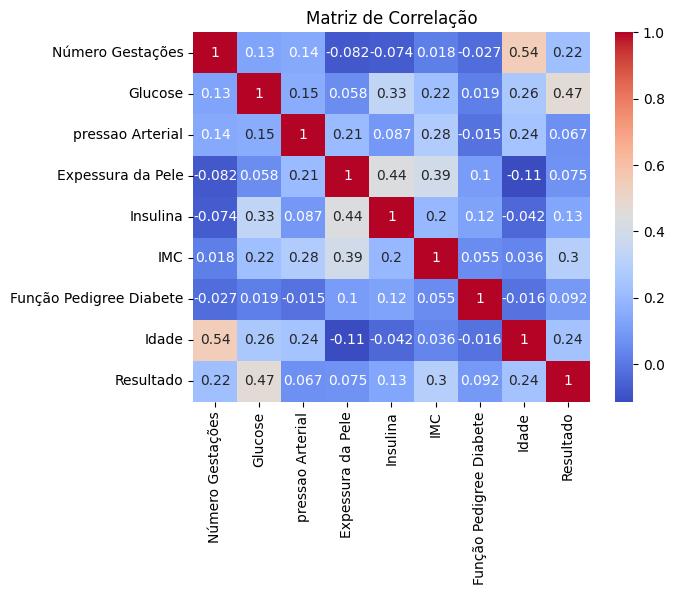

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plota um gráfico de correlação
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True)
plt.title('Matriz de Correlação')
plt.show()



*   A variável "Número de Gestações" possui uma correlação positiva fraca (0,13) com a variável "Glucose" e uma correlação positiva moderada (0,22) com a variável "Resultado". Isso sugere que o número de gestações tem uma relação ligeiramente maior com os níveis de glicose e uma relação um pouco mais significativa com o resultado de ter diabetes.


*   A variável "Glucose" apresenta uma correlação positiva moderada (0,47) com a variável "Resultado". Isso indica que níveis mais altos de glicose estão associados a um maior risco de diabetes.


*  A variável "IMC" possui uma correlação positiva moderada (0,3) com a variável "Resultado". Isso sugere que um índice de massa corporal maior está relacionado a um aumento na probabilidade de ter diabetes.


*   A variável "Idade" mostra uma correlação positiva forte (0,54) com a variável "Número de Gestações". Isso sugere que, à medida que a idade aumenta, é mais provável que uma mulher tenha tido um maior número de gestações.



Gráfico de dispersão

In [115]:
atributo = 'IMC'

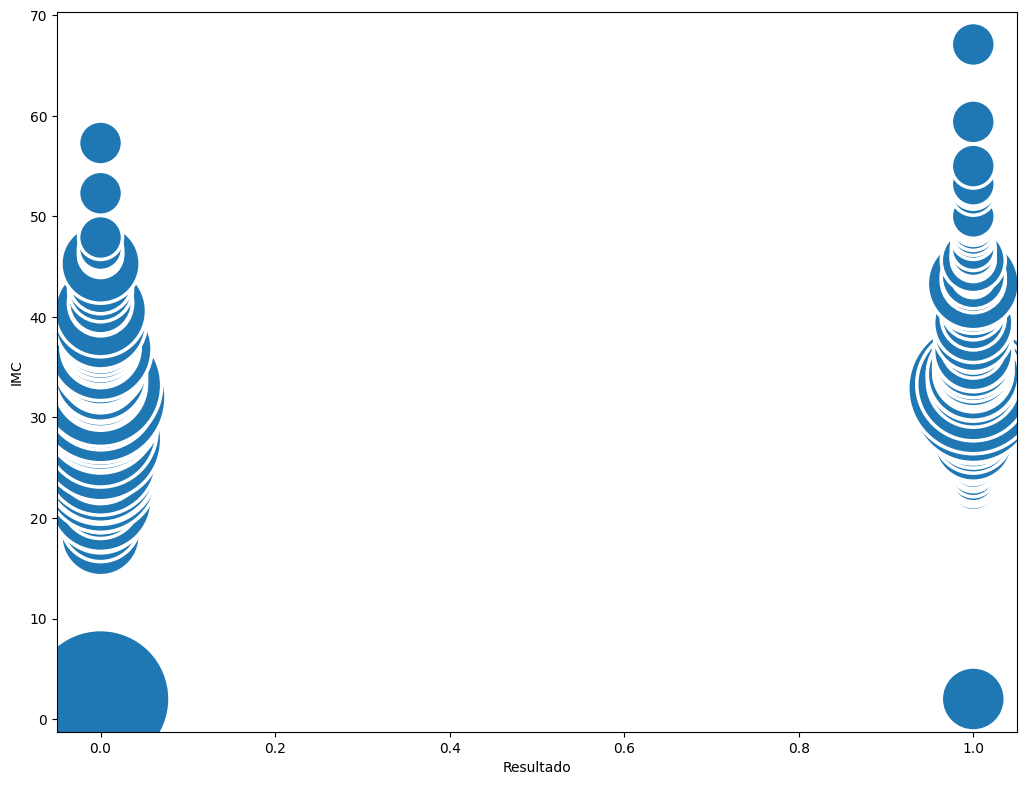

In [117]:
import seaborn as sns

df_dispersao =df[['Resultado', atributo]]
df_dispersao = df_dispersao.groupby(['Resultado',atributo]).size().reset_index(name="tamanho")
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

ax = sns.scatterplot(data=df_dispersao, x='Resultado', y = atributo, size="tamanho", legend=False, sizes=(1000,10000))
plt.show()

Lembrete: 


Resultados: 0- Não Diabético e 1- Diabético



#Processo 5 - Análise de Grupos

## Aplicando o algoritmo K-means

Importando as bibliotecas necessárias

In [136]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Definindo a função K-means do zero.

In [135]:
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids, 'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

Plotando os gráficos

In [138]:

def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

Função main

In [139]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

target = 'Resultado'
digits = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

[0.50407139 0.14025953]
(768, 2)


<ipython-input-138-6c3c8c040930>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
<ipython-input-138-6c3c8c040930>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


54.07223889790666
For n_clusters = 10, silhouette score is 0.7151015509943334)


<ipython-input-138-6c3c8c040930>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
<ipython-input-138-6c3c8c040930>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,


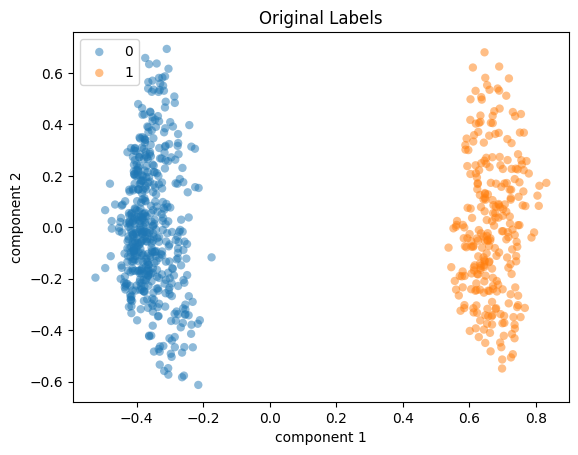

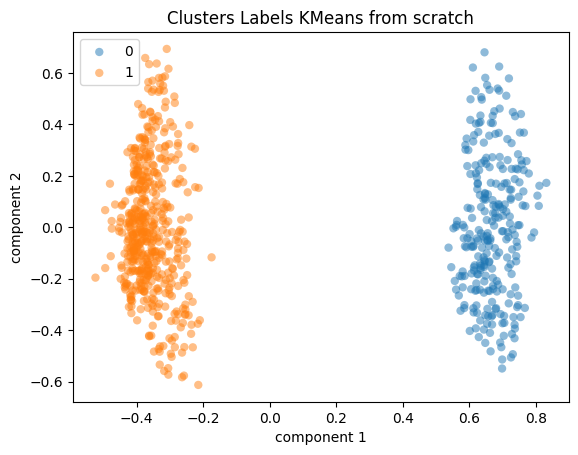

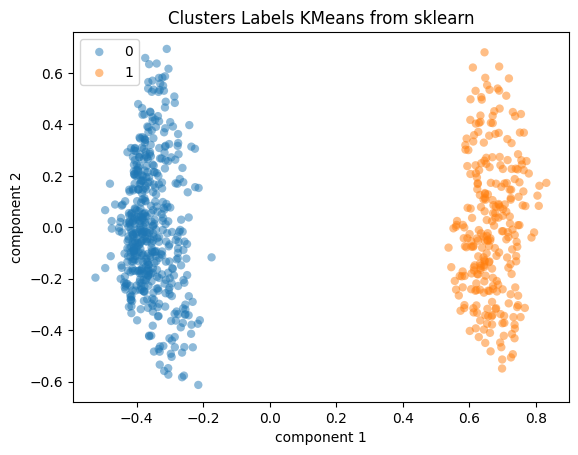

In [141]:
# Normalizar os dados usando Min-Max scaler
scaler = MinMaxScaler()
normalized_digits = scaler.fit_transform(digits)

# Aplicar o PCA aos dados normalizados
pca = PCA(2)
projected = pca.fit_transform(normalized_digits)
print(pca.explained_variance_ratio_)
print(projected.shape)

plot_samples(projected, digits.Resultado, 'Original Labels')

#Applying our kmeans function from scratch
labels = KMeans_scratch(projected,2,5)

#Visualize the results 
plot_samples(projected, labels, 'Clusters Labels KMeans from scratch')

#Applying sklearn kemans function
kmeans = KMeans(n_clusters=2).fit(projected)
print(kmeans.inertia_)
centers = kmeans.cluster_centers_
score = silhouette_score(projected, kmeans.labels_)    
print("For n_clusters = {}, silhouette score is {})".format(10, score))

#Visualize the results sklearn
plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from sklearn')

plt.show()

##Aplicando algoritmo GMM

Importando as bibliotecas necessárias

In [146]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Lendo a Base de Dados




In [147]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Plotando os gráficos*

In [159]:
def plot_samples(projected, labels, title):    
    fig = plt.figure(figsize=(10, 6))
    u_labels = np.unique(labels)
    colors = sns.color_palette("husl", len(u_labels))

    for i, color in zip(u_labels, colors):
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = f'Cluster {i}',
                    edgecolor='none', alpha=0.7, s=50, c=[color])
    
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

    plt.show()

Transformando a base de Dados utilizando o PCA

In [160]:
normalized_df = (df[features] - df[features].min()) / (df[features].max() - df[features].min())
#normalized_df = df[features].apply(zscore)
#normalized_df = df[features] / (10 ** np.ceil(np.log10(df[features].abs().max())))
    
# Separating out the features
x = df.loc[:, features].values
x = MinMaxScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)

# Apply PCA to the normalized data
pca = PCA(2)
projected = pca.fit_transform(normalizedDf)

Aplicando função sklearn GMM 

In [161]:
#Applying sklearn GMM function
gm  = GaussianMixture(n_components=2).fit(projected)
print(gm.weights_)
print(gm.means_)
x = gm.predict(projected)

[0.34895833 0.65104167]
[[ 9.32870907e-01  6.84197325e-04]
 [-5.00018806e-01 -3.66729766e-04]]


Visualizar o resultado gerado pelo sklearn

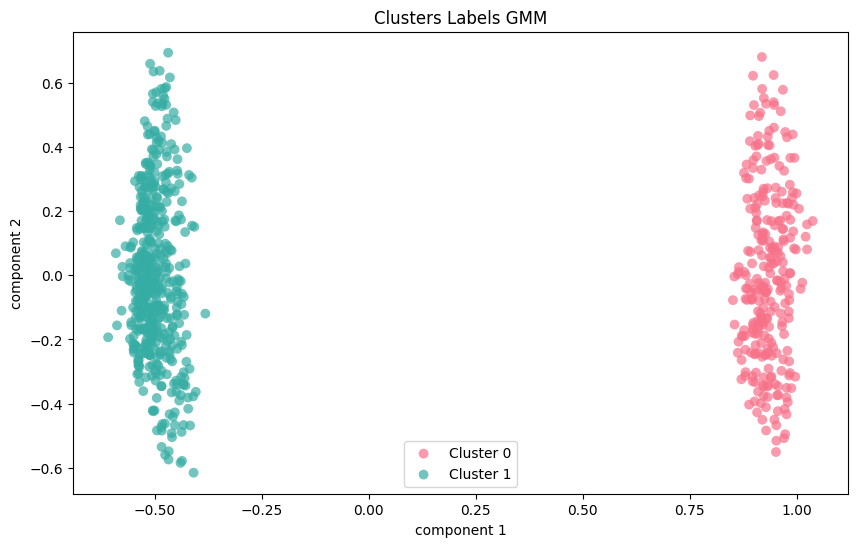

In [162]:
#Visualize the results sklearn

plot_samples(projected, x, 'Clusters Labels GMM')

plt.show()

#Processo 6 - Classificação de Dados



##Decision Three


Imports

In [164]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

Importando a base


In [172]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas
  

Separando features de targets

In [173]:
# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,[target]].values

Normalizando

In [174]:
 # Standardizing the features
X = MinMaxScaler().fit_transform(X)
normalizedDf = pd.DataFrame(data = X, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)

Dividindo em treino e teste

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0) #test_size=0.3,
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


Gerando e plotando a decision three

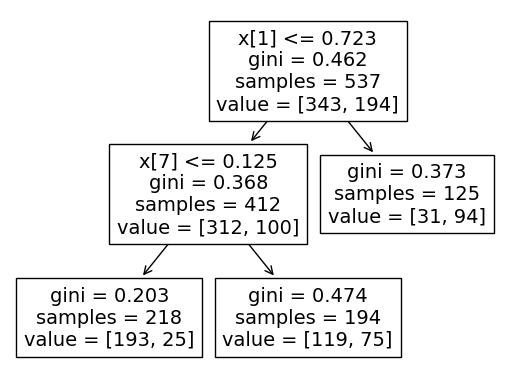

In [179]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.show()

In [180]:
predictions = clf.predict(X_test)
print(predictions)

result = clf.score(X_test, y_test)
print('Acuraccy:')
print(result)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0]
Acuraccy:
0.7316017316017316


#KNN

Imports Necessários


In [230]:
# Initial imports
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from tabulate import tabulate

Funçao para Calcular a Distância entre dois pontos

In [231]:
# Calculate distance between two points
def minkowski_distance(a, b, p=2):    
    # Store the number of dimensions
    dim = len(a)    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)    
    return distance

Predição KNN

In [232]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test

Plotagem da Matriz Confusão

In [233]:
np.set_printoptions(precision=2)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

Carregando a Base de Dados

In [234]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas
  
                  
target_names = ['Não Diabéticos','Diabéticos']

Separando Atributos do Rótulo

In [235]:
# Separating out the features
X = df.loc[:, features].values

df['target'] = target

#X = df.drop('target', axis=1)
#y = df.target.values

# Separating out the target
y = df.loc[:,target]
    
    
print("Total samples: {}".format(X.shape[0]))

Total samples: 768


Separando conjunto de Treinameto e conjunto de Teste

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Total train samples: {}".format(X_train.shape[0]))
print("Total test  samples: {}".format(X_test.shape[0]))

Total train samples: 576
Total test  samples: 192


Normalizando a Base de Dados por meio do min-max e balanceando ela por meio do Smote.

In [237]:
oversample = SMOTE()
X_train_b, y_train_b = oversample.fit_resample(X_train,y_train)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Realizando a Predição utilizando o Classificador KNN

In [238]:
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=2)

Calculando a Acurácia e F1 Score

In [239]:
# Get test accuracy score
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test, average='macro')
print("Acurracy K-NN from scratch: {:.2f}%".format(accuracy))
print("F1 Score K-NN from scratch: {:.2f}%".format(f1))

Acurracy K-NN from scratch: 71.88%
F1 Score K-NN from scratch: 0.66%


Plotando a Matriz Confusão

Confusion matrix, without normalization
[[109  21]
 [ 33  29]]
Normalized confusion matrix
[[0.84 0.16]
 [0.53 0.47]]


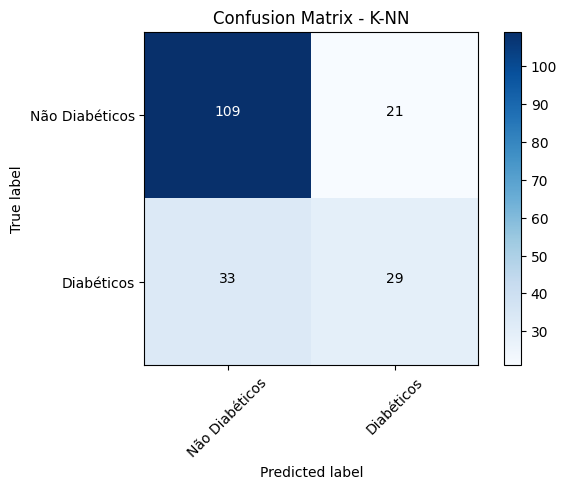

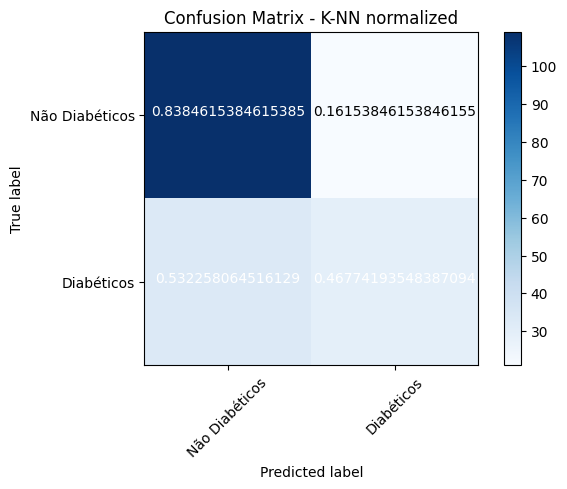

In [240]:
 # Get test confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - K-NN")      
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - K-NN normalized")  

Utilizando KNN pelo Sklearn

In [241]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_hat_test = knn.predict(X_test)

Calculando a Acurácia e F1 Score - KNN Sklearn

In [242]:
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test,average='macro')
print("Acurracy K-NN from sk-learn: {:.2f}%".format(accuracy))
print("F1 Score K-NN from sk-learn: {:.2f}%".format(f1))

Acurracy K-NN from sk-learn: 71.88%
F1 Score K-NN from sk-learn: 0.66%


Plotando a Matriz Confusão - KNN Sklearn

Confusion matrix, without normalization
[[109  21]
 [ 33  29]]
Normalized confusion matrix
[[0.84 0.16]
 [0.53 0.47]]


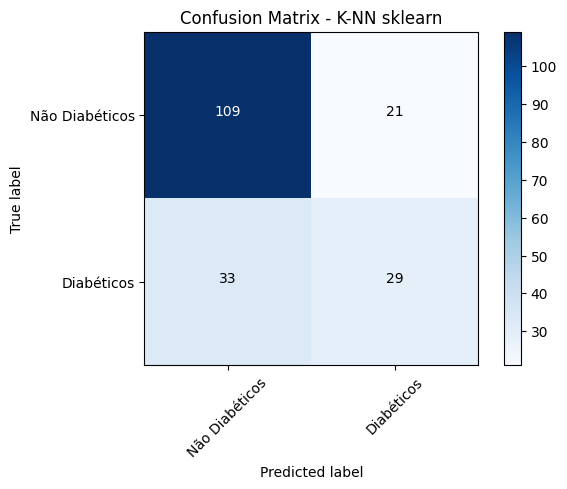

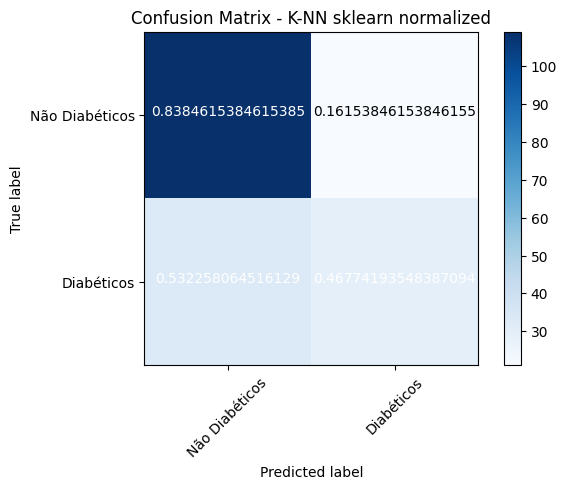

In [243]:
cm = confusion_matrix(y_test, y_hat_test)        
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - K-NN sklearn")      
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - K-NN sklearn normalized" )  
plt.show()

Utilizando a tabulação para organizar as saidas do KNN.

In [253]:
results = []
results.append(['Model', 'Accuracy', 'F1 Score'])
results.append(['K-NN from scratch', "{:.2f}%".format(accuracy), "{:.2f}%".format(f1)])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_b, y_train_b)
y_hat_test_b = knn.predict(X_test)

accuracy_b = accuracy_score(y_test, y_hat_test_b)*100
f1_b = f1_score(y_test, y_hat_test_b, average='macro')

results.append(['K-NN with SMOTE', "{:.2f}%".format(accuracy_b), "{:.2f}%".format(f1_b)])

print(tabulate(results, headers='firstrow'))
    
# STEP 3 - Confusion matrix tabulation
cm_scratch = confusion_matrix(y_test, y_hat_test)
cm_smote = confusion_matrix(y_test, y_hat_test_b)

# Create headers for tabulation
headers = ['Model', 'Confusion Matrix']
model_names = ['K-NN from scratch', 'K-NN with SMOTE']

# Create data for tabulation
data = []
for model, cm in zip(model_names, [cm_scratch, cm_smote]):
    cm_table = tabulate(cm, headers='keys', tablefmt='grid')
    data.append([model, cm_table])

# Print confusion matrices
print(tabulate(data, headers=headers))


Model              Accuracy    F1 Score
-----------------  ----------  ----------
K-NN from scratch  71.88%      0.66%
K-NN with SMOTE    67.71%      0.40%
Model              Confusion Matrix
-----------------  ------------------
K-NN from scratch  +-----+-----+
                   |   0 |   1 |
                   +=====+=====+
                   | 109 |  21 |
                   +-----+-----+
                   |  33 |  29 |
                   +-----+-----+
K-NN with SMOTE    +-----+-----+
                   |   0 |   1 |
                   +=====+=====+
                   | 130 |   0 |
                   +-----+-----+
                   |  62 |   0 |
                   +-----+-----+


##SVM

Importando as Bibliotecas

In [254]:
# Initial imports
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.svm import SVC

Carregando a Base de Dados

In [259]:
input_file = '/content/diabetesClear.data'
names = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade','Resultado'] 
features = ['Número Gestações','Glucose','pressao Arterial','Expessura da Pele','Insulina','IMC','Função Pedigree Diabete','Idade'] 

target = 'Resultado'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

# Separating out the features
target_names = ['Não Diabetico','Diabetico']
  

Separando Atributos de Rótulo

In [260]:
# Separating out the features
X = df.loc[:, features].values

df['target'] = target

#X = df.drop('target', axis=1)
#y = df.target.values

# Separating out the target
y = df.loc[:,target]

print("Total samples: {}".format(X.shape[0]))

Total samples: 768


Separando Dados de Treinamente e Teste

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Total train samples: {}".format(X_train.shape[0]))
print("Total test  samples: {}".format(X_test.shape[0]))

Total train samples: 576
Total test  samples: 192


Normalizando a Base de Dados por meio do Z-Score

In [263]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Testando o método SVM

In [264]:
svm = SVC(kernel='poly', C=1) # poly, rbf, linear
# training using train dataset
svm.fit(X_train, y_train)
# get support vectors
print(svm.support_vectors_)
# get indices of support vectors
print(svm.support_)
# get number of support vectors for each class
print("Qtd Support vectors: ")
print(svm.n_support_)
# predict using test dataset
y_hat_test = svm.predict(X_test)

[[0.06 0.59 0.47 ... 0.48 0.26 0.03]
 [0.24 0.78 0.5  ... 0.47 0.24 0.03]
 [0.47 0.49 0.68 ... 0.51 0.39 0.48]
 ...
 [0.47 0.78 0.63 ... 0.47 0.44 0.4 ]
 [0.47 0.63 0.78 ... 0.   0.23 0.55]
 [0.41 0.8  0.53 ... 0.44 0.38 0.25]]
[  1   5   7  11  21  23  26  27  32  33  38  41  46  48  56  57  64  65
  67  68  71  87  90  99 100 101 107 108 114 118 119 121 126 128 129 132
 133 134 141 144 148 149 150 154 166 169 170 173 181 186 190 191 192 193
 195 199 214 221 226 227 229 232 234 241 242 244 249 252 255 256 257 260
 261 262 267 273 274 277 278 282 284 288 289 291 293 298 305 306 311 314
 317 318 319 322 329 332 339 340 346 349 364 365 374 375 378 379 380 384
 385 389 391 398 402 403 408 412 425 428 440 444 446 456 457 458 459 463
 464 472 476 482 485 490 494 507 508 512 515 520 525 527 532 533 539 547
 557 560 562 567 570   4  12  16  18  24  25  28  30  34  35  39  42  43
  49  51  53  59  61  74  76  77  82  83  85  88  89 103 109 112 113 115
 116 125 127 131 137 139 140 158 159 161 1

Obtendo a Acurácia do Teste

In [265]:
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test,average='macro')
print("Acurracy SVM from sk-learn: {:.2f}%".format(accuracy))
print("F1 Score SVM from sk-learn: {:.2f}%".format(f1))

Acurracy SVM from sk-learn: 77.60%
F1 Score SVM from sk-learn: 0.72%


Plotando a matriz confusão 

Confusion matrix, without normalization
[[116  14]
 [ 29  33]]
Normalized confusion matrix
[[0.89 0.11]
 [0.47 0.53]]


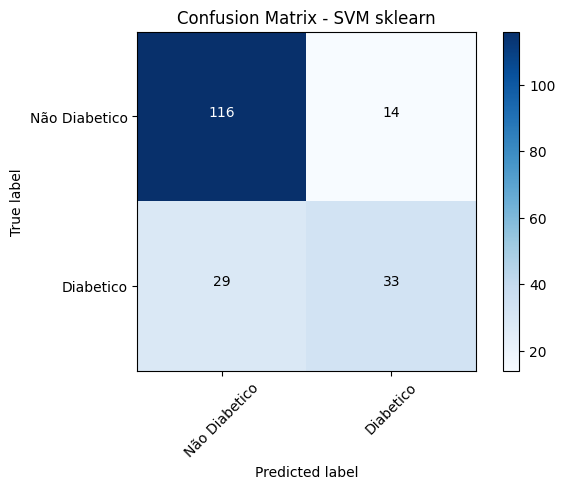

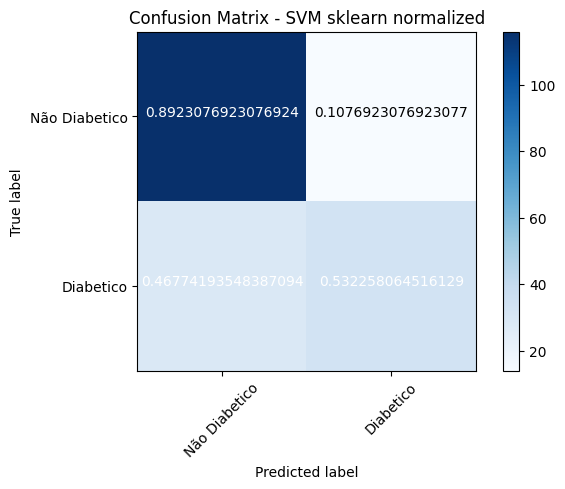

In [266]:
cm = confusion_matrix(y_test, y_hat_test)        
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - SVM sklearn")      
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - SVM sklearn normalized" )  
plt.show()